$
x_{2}
$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

In [2]:
# parameters
omega1 = 1.0  # frequency of the first level
omega2 = 0.9  # frequency of the second level
B_values = np.linspace(-2, 2, 200)

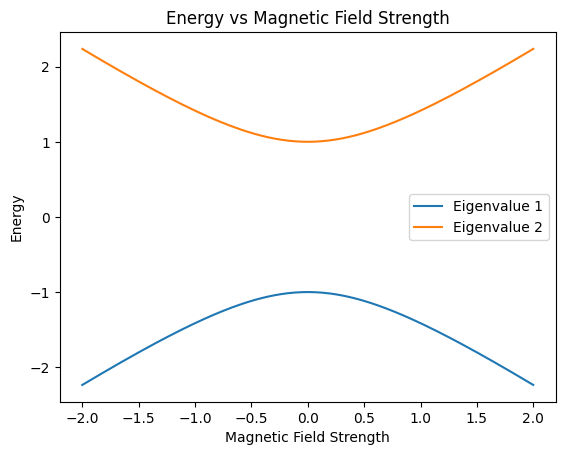

In [11]:
eigvals1 = []
eigvals2 = []

for B in B_values:
    # Hamiltonian
    H0 = omega1 * sigmaz() + B * sigmax()
    H1 = 0.1 * sigmax()
    H = [H0, [H1, 't']]

    # Calculate eigenvalues
    eigvals = H[0].eigenenergies()

    eigvals1.append(eigvals[0])
    eigvals2.append(eigvals[1])

# Plot the energy eigenvalues as a function of the magnetic field strength
plt.plot(B_values, eigvals1, label='Eigenvalue 1')
plt.plot(B_values, eigvals2, label='Eigenvalue 2')
plt.xlabel('Magnetic Field Strength')
plt.ylabel('Energy')
plt.title('Energy vs Magnetic Field Strength')
plt.legend()
plt.show()

In [31]:
# Define the Hamiltonian components
H0 = sigmax()
H1 = sigmaz()

# Time-dependent Hamiltonian
H = [[H0, Omega], [H1, Delta]]

# Initial state: |0> state
psi0 = basis(2, 0)

# Solve the Schrödinger equation
result = mesolve(H, psi0, tlist, [], [])

# Extract the populations of state |0> and state |1>
p0 = expect(basis(2, 0) * basis(2, 0).dag(), result.states)
p1 = expect(basis(2, 1) * basis(2, 1).dag(), result.states)

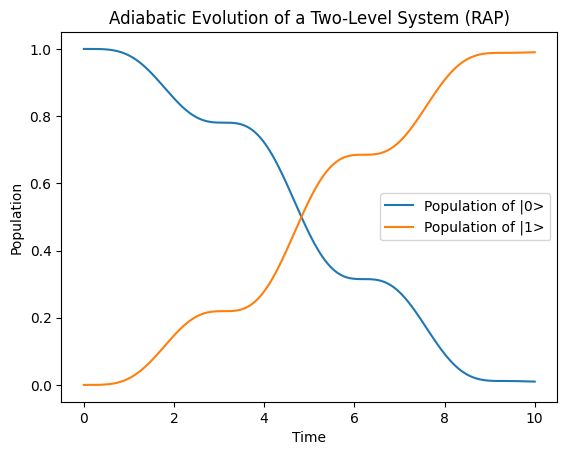

In [32]:
# Plot the results
plt.figure()
plt.plot(tlist, p0, label='Population of |0>')
plt.plot(tlist, p1, label='Population of |1>')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Adiabatic Evolution of a Two-Level System (RAP)')
plt.show()

(1+0j)
(1+0j)
Logical |0_L> is stabilized: True
(1+0j)
(1+0j)
Logical |1_L> is stabilized: True
Logical |0_L>:
 Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Logical |1_L>:
 Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]
Logical qubit:
 Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.70710678]]
